# Default Setup

In [1]:
# Dataloading Stuff
from sys import path
import os
from os import mkdir, system

# Standard Stuff
!pip3 install numpy sklearn iterative-stratification pandas pyss3
from sklearn.model_selection import train_test_split

from pyss3 import SS3, set_verbosity
from pyss3.util import Dataset, Evaluation, span
set_verbosity(0)

import numpy as np
import pandas as pd

!pip3 install nltk
from nltk import word_tokenize, sent_tokenize, download
download('punkt')

path_root = '/Volumes/Lacy/Pipeline_Workflow/'
path.append(path_root)
data_root = 'data/'

You should consider upgrading via the '/Volumes/Lacy/Pipeline_Workflow/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Volumes/Lacy/Pipeline_Workflow/venv/bin/python -m pip install --upgrade pip' command.


[nltk_data] Downloading package punkt to /Users/angrymeir/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from util_pipeline import Metrics

## Load Data

In [3]:
# Amazon Alexa 5 Classes
df = pd.read_csv(path_root + data_root + "AmazonAlexaReview/amazon_alexa.tsv", sep="\t")
text = df['verified_reviews'].to_list()
labels = df['rating'].astype(str).to_list()
X_train_Alexa, X_val_Alexa, y_train_Alexa, y_val_Alexa = train_test_split(text, labels, test_size=0.2)

# Amazon Alexa 2 Classes
new_labels = df['rating'].astype(str).replace(to_replace={'1': 'negative', '2': 'negative', '3': 'negative', '4': 'positive', '5': 'positive'}, regex=True).to_list()
X_train_Alexa2, X_val_Alexa2, y_train_Alexa2, y_val_Alexa2 = train_test_split(text, new_labels, test_size=0.2)

# Beer Review
with open(path_root + data_root + 'BeerReview/test.txt', 'r') as text_file:
  text = text_file.read().split('\n')
with open(path_root + data_root + 'BeerReview/test_label.txt', 'r') as label_file:
  labels = label_file.read().split('\n')
X_train_Beer, X_val_Beer, y_train_Beer, y_val_Beer = train_test_split(text, labels, test_size=0.2)

# City Review
with open(path_root + data_root + 'CityReview/test.txt', 'r') as text_file:
  text = text_file.read().split('\n')

with open(path_root + data_root + 'CityReview/test_label.txt', 'r') as label_file:
  labels = label_file.read().split('\n')
X_train_City, X_val_City, y_train_City, y_val_City = train_test_split(text, labels, test_size=0.2)

# IMDB
df = pd.read_csv(path_root + data_root + "IMDBReviews/IMDB Dataset.csv", sep=";")
df['review'].replace({'<br />': '\\n'}, inplace=True, regex=True)
df.dropna(inplace=True)
text = df['review'].to_list()
labels = df['sentiment'].to_list()
X_train_IMDB, X_val_IMDB, y_train_IMDB, y_val_IMDB = train_test_split(text, labels, test_size=0.2)

# SemEval2017
df = pd.read_csv(path_root + data_root + "SemEval2017/SemEval2017-task4-dev.subtask-A.english.INPUT.txt", sep="\t", header=None)
df = df[[1,2]]
labels = df[1].to_list()
text = df[2].to_list()
X_train_SemEval, X_val_SemEval, y_train_SemEval, y_val_SemEval = train_test_split(text, labels, test_size=0.2)

# Tutorial Movie Review
X_train_MovieRev, y_train_MovieRev = Dataset.load_from_files(path_root + data_root + "TutorialMovieReview/train")
X_val_MovieRev, y_val_MovieRev = Dataset.load_from_files(path_root + data_root + "TutorialMovieReview/test")

# Tutorial Topic Classification
X_train_TopicClas, y_train_TopicClas = Dataset.load_from_files(path_root + data_root + "TutorialTopicClassification/train", folder_label=False)
X_val_TopicClas, y_val_TopicClas = Dataset.load_from_files(path_root + data_root + "TutorialTopicClassification/test", folder_label=False)

# Apple Twitter Sentiment
df = pd.read_csv(path_root + data_root + "X_AppleTwitterSentiment/apple-twitter-sentiment-texts.csv")
text = df['text'].astype(str).to_list()
labels = df['sentiment'].astype(str).to_list()
X_train_Apple, X_val_Apple, y_train_Apple, y_val_Apple = train_test_split(text, labels, test_size=0.2)

# Spam Detection
df = pd.read_csv(path_root + data_root + "X_SpamDetection/SPAMtextmessage.csv")
text = df['Message'].to_list()
labels = df['Category'].to_list()
X_train_Spam, X_val_Spam, y_train_Spam, y_val_Spam = train_test_split(text, labels, test_size=0.2)

# Womans Clothing Reviews
df = pd.read_csv(path_root + data_root + "X_WomansClothing/Womens Clothing E-Commerce Reviews.csv")
text = df['Review Text'].astype(str).to_list()
labels = df['Rating'].astype(str).to_list()
recom = df['Recommended IND'].astype(str).to_list()
X_train_Clothing5, X_val_Clothing5, y_train_Clothing5, y_val_Clothing5 = train_test_split(text, labels, test_size=0.2)
X_train_Clothing2, X_val_Clothing2, y_train_Clothing2, y_val_Clothing2 = train_test_split(text, recom, test_size=0.2)

In [4]:
dataset = [(X_train_Alexa, X_val_Alexa, y_train_Alexa, y_val_Alexa, 'Alexa5'),
           (X_train_Alexa2, X_val_Alexa2, y_train_Alexa2, y_val_Alexa2, 'Alexa2'),
           (X_train_Beer, X_val_Beer, y_train_Beer, y_val_Beer, 'Beer'),
           (X_train_City, X_val_City, y_train_City, y_val_City, 'City'),
           (X_train_IMDB, X_val_IMDB, y_train_IMDB, y_val_IMDB, 'IMDB'),
           (X_train_SemEval, X_val_SemEval, y_train_SemEval, y_val_SemEval, 'SemEval'),
           (X_train_MovieRev, X_val_MovieRev, y_train_MovieRev, y_val_MovieRev, 'MovieReview'),
           (X_train_TopicClas, X_val_TopicClas, y_train_TopicClas, y_val_TopicClas, 'TopicClasssification'),
           (X_train_Apple, X_val_Apple, y_train_Apple, y_val_Apple, 'Apple'),
           (X_train_Spam, X_val_Spam, y_train_Spam, y_val_Spam, 'Spam'),
           (X_train_Clothing5, X_val_Clothing5, y_train_Clothing5, y_val_Clothing5, 'Clothing5'),
           (X_train_Clothing2, X_val_Clothing2, y_train_Clothing2, y_val_Clothing2, 'Clothing2')
           ]

## Calculate the characteristics for each dataset

In [5]:
def calc_metrics(dataset):
  metrics_list = []
  scores = []
  for X_train, X_val, y_train, y_val, description in dataset:
    print(description)
    system("rm -rf {}".format(description + '/'))
    mkdir('{}'.format(description + '/'))
    clf = SS3()
    clf.fit(X_train, y_train)
    score = Evaluation.test(clf, X_val, y_val, plot=False, metric='f1-score')
    m = Metrics(clf, X_train, y_train, description)
    metrics_list.append(m.all_metrics())
    scores.append(score)

  df = pd.DataFrame(metrics_list)
  df["F1 Score"] = scores
  return df

df = calc_metrics(dataset)

Alexa5

              precision    recall  f1-score   support

           1       0.30      0.29      0.30        24
           2       0.16      0.26      0.20        19
           3       0.31      0.40      0.35        30
           4       0.43      0.29      0.35        99
           5       0.84      0.86      0.85       458

    accuracy                           0.71       630
   macro avg       0.41      0.42      0.41       630
weighted avg       0.71      0.71      0.70       630


 Accuracy: 0.708

13935.0
Alexa2

              precision    recall  f1-score   support

           1       0.30      0.29      0.30        24
           2       0.16      0.26      0.20        19
           3       0.31      0.40      0.35        30
           4       0.43      0.29      0.35        99
           5       0.84      0.86      0.85       458

    accuracy                           0.71       630
   macro avg       0.41      0.42      0.41       630
weighted avg       0.71      0.71 

## Calculate the Pearson and Spearman (Kendall) correlation between characteristics and macro avg. F1 score
This might be an inidicator, but certainly is not representative

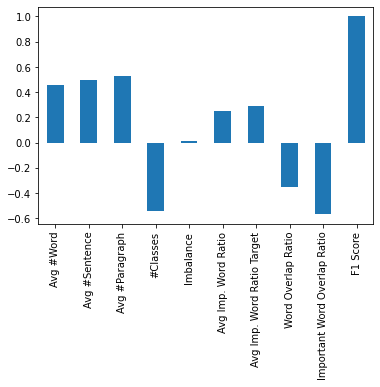

In [11]:
correlation = df.corrwith(df["F1 Score"], axis=0, method='pearson')
correlation.plot(kind='bar')

In [12]:
correlation.sort_values(ascending=False)

F1 Score                        1.000000
Avg #Paragraph                  0.527177
Avg #Sentence                   0.497912
Avg #Word                       0.458440
Avg Imp. Word Ratio Target      0.293905
Avg Imp. Word Ratio             0.249494
Imbalance                       0.011352
Word Overlap Ratio             -0.350677
#Classes                       -0.543916
Important Word Overlap Ratio   -0.567101
dtype: float64

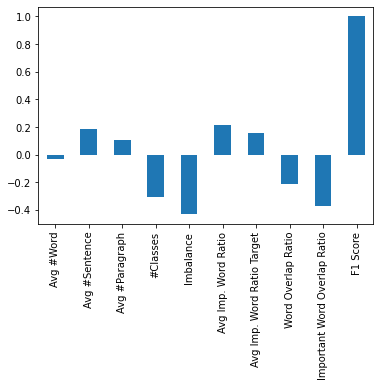

In [15]:
correlation = df.corrwith(df["F1 Score"], axis=0, method='kendall')
correlation.plot(kind='bar')

In [14]:
correlation.sort_values(ascending=False)

F1 Score                        1.000000
Avg Imp. Word Ratio             0.215410
Avg #Sentence                   0.184637
Avg Imp. Word Ratio Target      0.153864
Avg #Paragraph                  0.105021
Avg #Word                      -0.030773
Word Overlap Ratio             -0.215410
#Classes                       -0.306186
Important Word Overlap Ratio   -0.369274
Imbalance                      -0.430820
dtype: float64

## Final Dataframe showing characteristics and F1 scores

In [9]:
df.sort_values(by=['F1 Score'], ascending=False)

,Avg #Word,Avg #Sentence,Avg #Paragraph,#Classes,Imbalance,Avg Imp. Word Ratio,Avg Imp. Word Ratio Target,Word Overlap Ratio,Important Word Overlap Ratio,F1 Score
Spam,18.939421,2.007628,1.000000,2.0,6.415973,0.446092,0.431841,0.145422,0.060053,0.921793
MovieReview,267.356007,12.552728,5.114754,2.0,1.575299,0.439056,0.437378,0.495548,0.433929,0.861986
IMDB,270.233686,12.518029,5.141862,2.0,1.001859,0.443307,0.442740,0.560871,0.316818,0.830358
TopicClasssification,28.458472,7.945024,1.000000,8.0,1.868425,0.537998,0.533980,0.302252,0.302000,0.694964
Apple,19.988497,1.555982,1.133436,3.0,5.495726,0.152964,0.141454,0.209392,0.209392,0.673001
Beer,6.645690,0.999865,1.000000,7.0,1860.000000,0.800020,0.757133,0.460714,0.460714,0.623486
SemEval,23.750985,1.750076,1.000061,3.0,3.235202,0.137236,0.130127,0.448659,0.444666,0.517649
Alexa5,28.752381,2.294841,1.000000,5.0,24.105263,0.209396,0.192324,0.403879,0.403879,0.408180
Alexa2,29.205556,2.323413,1.000000,2.0,6.850467,0.380975,0.374467,0.330849,0.241431,0.408180
Clothing5,66.904620,4.648552,1.201352,5.0,15.881203,0.172975,0.168175,0.594857,0.594857,0.311794
